## Data loading
Firstly, I will use fastai library to fine-tune resnet34 model to better classify images of cats and dogs in dogs-vs-cats dataset. 
1. **Stage 1**
    - Re-train only FC layers
2. **Stage 2**
    - Update weights
3. **Stage 3**
    - Download some more data from the internet and use it to extend original dataset.

In [1]:
# Don't use this if work in Colab
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [18]:
# Global constants
BATCH_SIZE = 32

path = Path('/home/zakajd/Downloads/deep-learning/data/dogs-vs-cats')
path_val = path/'val'
path_test = path/'test_labeled'
path_train = path/'train_11k'

In [24]:
# doc(ImageDataBunch.from_folder)
path

PosixPath('/home/zakajd/Downloads/deep-learning/data/dogs-vs-cats')

### Stage 1

In [27]:
# path = untar_data(URLs.MNIST_SAMPLE); path
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, bs=BATCH_SIZE).normalize(imagenet_stats)

# data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224)

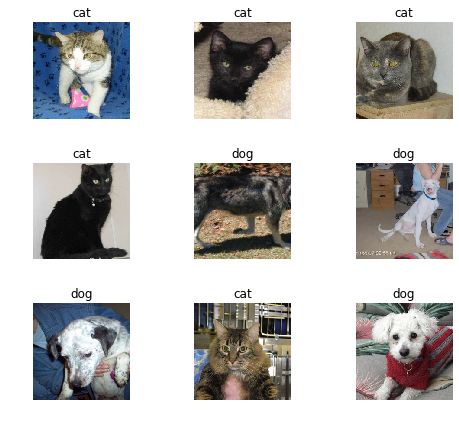

In [28]:
data.show_batch(rows=3, figsize=(7,6))

In [30]:
print(data.classes)
len(data.classes),data.c

['cat', 'dog']


(2, 2)

In [33]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
# learn.model

In [ ]:
learn.fit_one_cycle(3)

In [35]:
learn.save('stage-1')